In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import unsharp_mask
from skimage.filters import gaussian
from skimage import color

Load image and visualize it

rows=807, cols=824, shape=(807, 824)


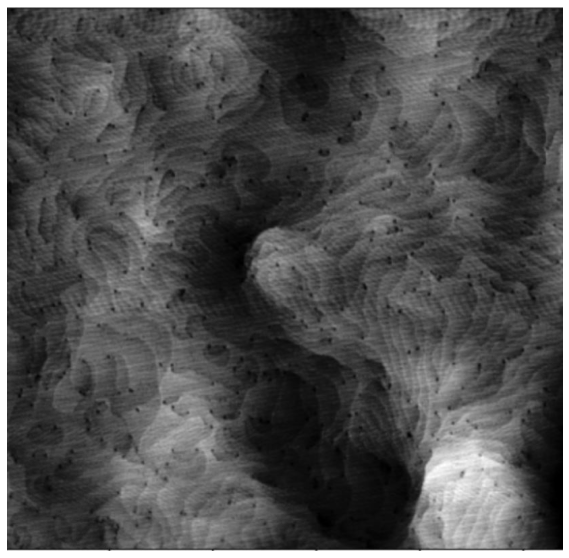

In [3]:
im = cv2.imread("D:/Users/xmyst/Desktop/FYP Materials/Images/original_images/afm_black_1.jpg", cv2.IMREAD_GRAYSCALE)
print(f"rows={im.shape[0]}, cols={im.shape[1]}, shape={im.shape}")

fig, ax = plt.subplots(1, figsize=(20,10))
ax.imshow(im, cmap="gray")
ax.axis("off");

Set parameters

In [16]:
def init_params():
    params = cv2.SimpleBlobDetector_Params()
    params.thresholdStep = 10
    params.minThreshold = 0
    params.maxThreshold = 255

    params.minDistBetweenBlobs = 30
    params.filterByColor = False

    params.filterByArea = True
    params.minArea = 10
    params.maxArea = 40

    params.filterByCircularity = True
    params.minCircularity = 0.1
    #params.maxCircularity = 1e37

    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    params.filterByConvexity = True
    params.minConvexity = 0.85

    return params


Blob detector function

In [17]:
# Function for blob detection
def blobdetect(image, params):
    # Set up the detector with custom parameters.
    detector = cv2.SimpleBlobDetector_create(params)
    # Detect blobs.
    keypoints = detector.detect(image)
    # Draw detected blobs as blue circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    print("Blobs detected: " + str(len(keypoints)))
    return im_with_keypoints

Low-pass filter and initialize parameters

In [18]:
params = init_params()
im = cv2.GaussianBlur(im, (3, 3), 0)

Blob detection comparison on original grayscaled image

Blobs detected: 328


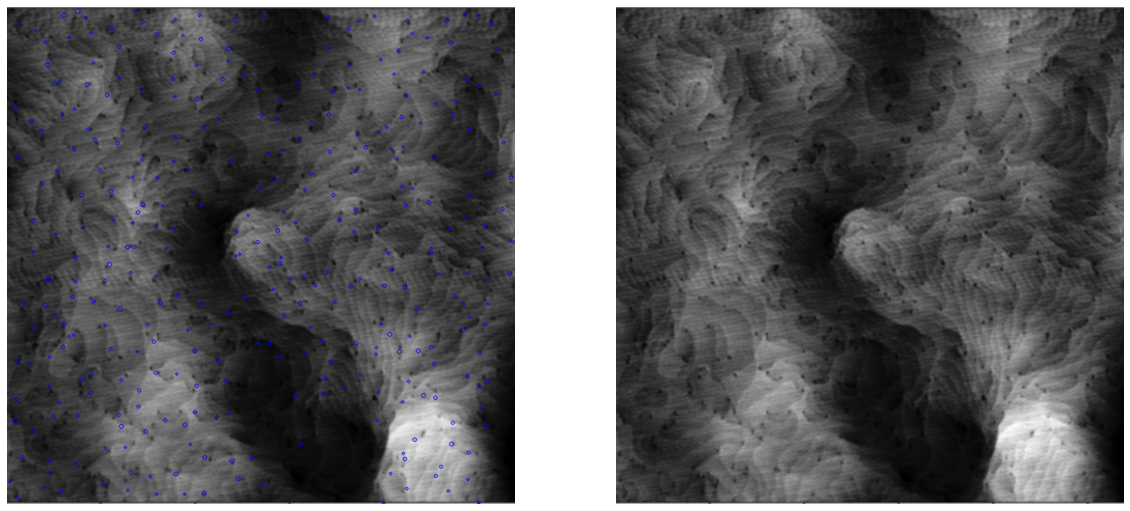

In [19]:
# Blob detection on image with only low-pass filter
im_with_keypoints = blobdetect(im, params)

# Show keypoints
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].axis("off")
ax[0].imshow(im_with_keypoints, cmap="gray")
ax[1].axis("off")
ax[1].imshow(im, cmap="gray")

Blob detection comparison on histogram equalized image

0 242


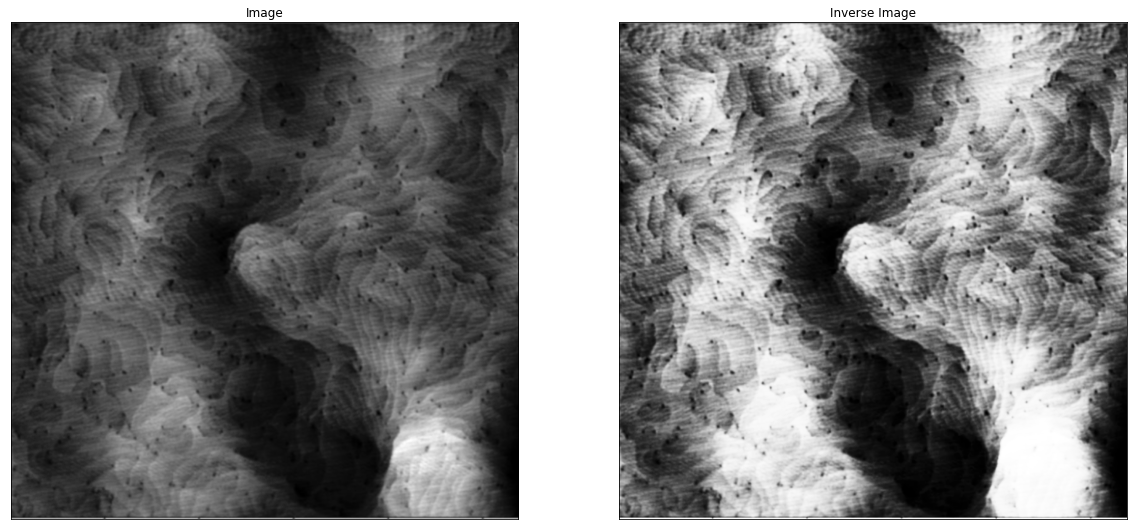

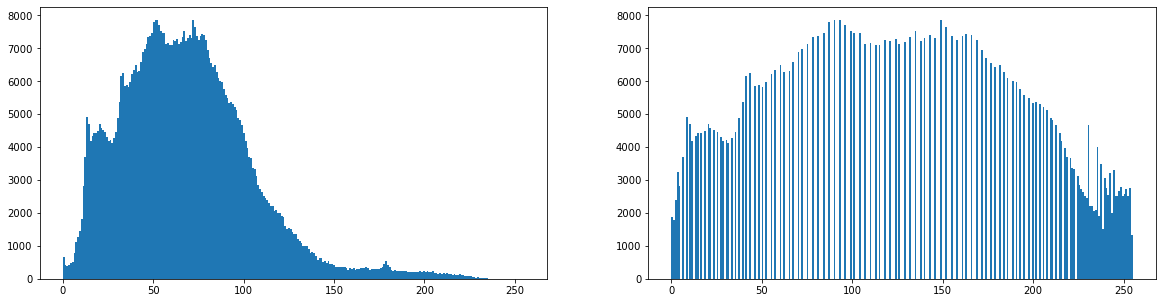

In [20]:
# Apply Histogram Equalization
# Function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  print(im.min(),im.max())
  # get the image histogram

  imh = np.zeros(nbr_bins)
  n_row = im.shape[0]
  n_col = im.shape[1]
  for x in range(0, n_row):
      for y in range(0, n_col):
          imh[im[x,y]]+=1
  imh = imh/np.sum(imh)
  cdf = np.zeros(nbr_bins)
  cdf[0]=imh[0]
  for x in range(1, nbr_bins):
      cdf[x] = cdf[x-1]+imh[x]

  cdf = cdf/cdf.max()   #normalize
 
  g = np.zeros(nbr_bins)
  for x in range(im.min(), im.max()):
      g[x] = np.round((cdf[x]-cdf[im.min()])/(1.0-cdf[im.min()])*(nbr_bins-1))
  for x in range(im.max(), nbr_bins):
      g[x] = nbr_bins-1
 
  n_row = im.shape[0]
  n_col = im.shape[1]
  ime = np.copy(im)
  for x in range(0, n_row):
      for y in range(0, n_col):
          ime[x,y] = g[im[x,y]]
  return ime

imgg = im.astype(np.uint8)
imggeq = histeq(imgg)

plt.figure(figsize=([20, 20]))
plt.subplot(121),plt.imshow(imgg, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imggeq, cmap = 'gray')
plt.title('Inverse Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=([20, 5]))
plt.subplot(121), plt.hist(imgg.ravel(), 256, [0,255]);
plt.subplot(122), plt.hist(imggeq.ravel(), 256, [0,255]);

Blobs detected: 403


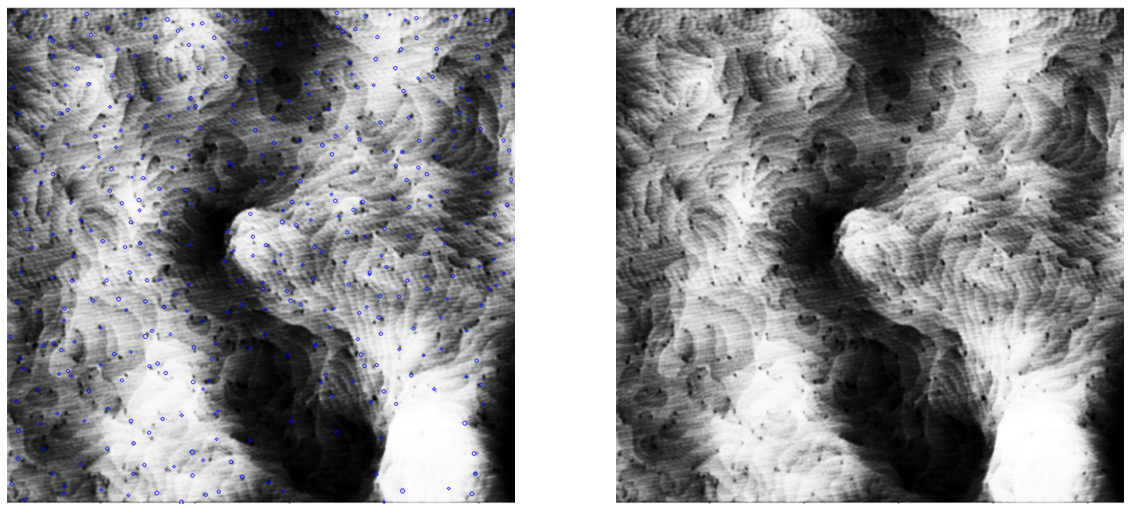

In [21]:
im_with_keypoints = blobdetect(imggeq, params)

# Show keypoints
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].axis("off")
ax[0].imshow(im_with_keypoints, cmap="gray")
ax[1].axis("off")
ax[1].imshow(imggeq, cmap="gray")